In [96]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import seaborn
import re
import time


In [97]:
options = Options()
options.add_argument('--start-maximized')
options.add_argument('--disable-notifications')
options.add_argument('--disable-infobars')
options.add_argument('--disable-extensions')

service = Service(ChromeDriverManager().install())


In [98]:
driver = webdriver.Chrome(service=service, options=options)


In [99]:
# open first Coursera page directly (no Google)

first_course_url = "https://www.coursera.org/search?query=data%20science&page=1"
driver.get(first_course_url)


In [100]:
# Coursera course search URLs (different domains)

course_urls = {
    "Data Science": "https://www.coursera.org/search?query=data%20science",
    "Data Analytics": "https://www.coursera.org/search?query=data%20analytics",
    "Web Development": "https://www.coursera.org/search?query=web%20development",
    "Cloud Computing": "https://www.coursera.org/search?query=cloud%20computing",
    "Machine Learning": "https://www.coursera.org/search?query=machine%20learning"
}

# number of pages per course
pages = 15   # 15 pages × 12 courses × 5 categories ≈ 900 rows

print("Cell 4 loaded: URLs and page limit set successfully")


Cell 4 loaded: URLs and page limit set successfully


In [26]:
titles_list = []

for course_name, base_url in course_urls.items():

    for page in range(1, pages + 1):

        url = base_url + f"&page={page}"
        driver.get(url)

        time.sleep(3)

        titles = driver.find_elements(
            By.XPATH, "//h3[contains(@class,'cds-CommonCard-title')]"
        )

        for title in titles:
            text = title.text.strip()

            if text != "":
                titles_list.append(text)


In [87]:
titles_list

['Python for Data Science, AI & Development',
 'What is Data Science?',
 'IBM Data Science',
 'Foundations of Data Science',
 'Databases and SQL for Data Science with Python',
 'Introduction to Data Science',
 'Introduction to Data Science in Python',
 'Data Science',
 'Applied Data Science with Python',
 'Data Analysis with Python',
 'SQL for Data Science',
 'Mathematics for Machine Learning and Data Science',
 'Google Data Analytics',
 'Python Project for Data Science',
 'Data Science Fundamentals with Python and SQL',
 'Data Science Foundations',
 'Google Advanced Data Analytics',
 'Applied Data Science',
 'A Crash Course in Data Science',
 'Genomic Data Science',
 'Data Science Beyond the Basics (ML+DS)',
 'Data Science Math Skills',
 'Mathematical Foundations for Data Science and Analytics',
 'Probability & Statistics for Machine Learning & Data Science',
 'IBM Data Analyst',
 'Advanced Statistics for Data Science',
 'Data Science Challenge',
 'Master of Science in Data Science',


In [45]:
provider_list = []

for course_name, base_url in course_urls.items():

    for page in range(1, pages + 1):

        url = base_url + f"&page={page}"
        driver.get(url)

        time.sleep(3)

        providers = driver.find_elements(
            By.CLASS_NAME, "cds-ProductCard-partnerNames"
        )

        for p in providers:
            text = p.text.strip()

            if text != "":
                provider_list.append(text)


In [88]:
provider_list

['IBM',
 'IBM',
 'IBM',
 'Google',
 'IBM',
 'IBM',
 'University of Michigan',
 'Johns Hopkins University',
 'University of Michigan',
 'IBM',
 'University of California, Davis',
 'DeepLearning.AI',
 'Google',
 'IBM',
 'IBM',
 'Multiple educators',
 'Google',
 'IBM',
 'Johns Hopkins University',
 'Johns Hopkins University',
 'Coursera',
 'Duke University',
 'University of Pittsburgh',
 'DeepLearning.AI',
 'IBM',
 'Johns Hopkins University',
 'Coursera',
 'University of Colorado Boulder',
 'IBM',
 'Google',
 'Imperial College London',
 'Coursera',
 'Johns Hopkins University',
 'Johns Hopkins University',
 'IBM',
 'University of Colorado System',
 'Coursera',
 'Google',
 'DeepLearning.AI',
 'Coursera',
 'EDUCBA',
 'University of California, Irvine',
 'Pearson',
 'IBM',
 'University of Leeds',
 'Microsoft',
 'Corporate Finance Institute',
 'Google',
 'Johns Hopkins University',
 'University of Michigan',
 'University of Colorado Boulder',
 'University of Colorado Boulder',
 'University of 

In [48]:
skills_list = []

for course_name, base_url in course_urls.items():

    for page in range(1, pages + 1):

        url = base_url + f"&page={page}"
        driver.get(url)

        time.sleep(3)

        skills_gained = driver.find_elements(
            By.CLASS_NAME, "cds-ProductCard-body"
        )

        for skill in skills_gained:
            text = skill.text.replace("Skills you'll gain:", "").strip()

            if text != "":
                skills_list.append(text)


In [89]:
skills_list

['Data Import/Export, Programming Principles, Web Scraping, File I/O, Python Programming, Jupyter, Data Structures, Pandas (Python Package), Data Manipulation, JSON, Computer Programming, Restful API, NumPy, Object Oriented Programming (OOP), Application Programming Interface (API), Automation, Data Analysis',
 'Data Literacy, Data Mining, Big Data, Cloud Computing, Data Analysis, Data Science, Digital Transformation, Data-Driven Decision-Making, Deep Learning, Machine Learning, Artificial Intelligence',
 'Exploratory Data Analysis, Dashboard, Data Visualization Software, Data Visualization, Model Evaluation, SQL, Unsupervised Learning, Interactive Data Visualization, Data Transformation, Supervised Learning, Jupyter, Data Analysis, Data Cleansing, Data Manipulation, Data Literacy, Plotly, Data Mining, Generative AI, Professional Networking, Data Import/Export',
 'Data Storytelling, Data Ethics, Data-Driven Decision-Making, Analytics, Workflow Management, Business Analytics, Data Scien

In [63]:
rating_list = []

for course_name, base_url in course_urls.items():

    for page in range(1, pages + 1):

        url = base_url + f"&page={page}"
        driver.get(url)

        time.sleep(3)

        ratings = driver.find_elements(
            By.CLASS_NAME, "cds-RatingStat-sizeLabel"
        )

        for r in ratings:
            text = r.text.strip()

            match = re.search(r"\b\d\.\d\b", text)
            if match:
                rating_list.append(match.group())
            else:
                rating_list.append("NA")


In [90]:
rating_list

['4.6',
 '4.7',
 '4.6',
 '4.7',
 '4.7',
 '4.6',
 '4.5',
 '4.5',
 '4.5',
 '4.7',
 '4.6',
 '4.6',
 '4.8',
 '4.5',
 '4.6',
 '4.6',
 '4.7',
 '4.6',
 '4.5',
 '4.5',
 '4.2',
 '4.5',
 '4.1',
 '4.6',
 '4.6',
 '4.4',
 '4.7',
 '4.5',
 '4.8',
 '4.6',
 '3.8',
 '4.4',
 '4.6',
 '4.6',
 '4.5',
 '4.7',
 '4.8',
 '4.6',
 'NA',
 '4.7',
 '4.3',
 '4.5',
 '4.7',
 '4.8',
 '4.8',
 '4.5',
 '4.9',
 '4.2',
 '4.5',
 '4.7',
 '4.5',
 '4.9',
 '4.8',
 '4.7',
 'NA',
 '4.6',
 '4.7',
 '4.8',
 '4.7',
 '4.3',
 '4.2',
 '4.7',
 '4.8',
 '4.3',
 '4.2',
 '4.8',
 '4.5',
 '4.7',
 '4.4',
 '3.9',
 '4.6',
 '4.1',
 '4.5',
 '2.7',
 '4.3',
 '4.3',
 '4.8',
 '3.9',
 '4.3',
 '4.7',
 '4.5',
 '4.6',
 '4.9',
 '4.7',
 '3.7',
 'NA',
 '4.7',
 '4.5',
 '4.2',
 '3.4',
 '4.8',
 '4.5',
 '4.5',
 '4.6',
 '4.5',
 '4.5',
 '4.7',
 '4.4',
 '4.9',
 '4.7',
 '4.7',
 '4.6',
 '4.7',
 '4.5',
 '4.5',
 '4.6',
 '4.8',
 '4.8',
 '4.7',
 '4.8',
 '4.7',
 'NA',
 '4.8',
 '4.8',
 '4.3',
 '4.6',
 '4.9',
 '4.7',
 '4.9',
 '4.2',
 '4.4',
 '4.6',
 '4.4',
 '4.6',
 '4.5',
 '4.

In [44]:
review_list = []

for course_name, base_url in course_urls.items():

    for page in range(1, pages + 1):

        url = base_url + f"&page={page}"
        driver.get(url)
        time.sleep(2)

        stats = driver.find_elements(
            By.CLASS_NAME, "cds-RatingStat-sizeLabel"
        )

        for s in stats:
            text = s.text.lower().replace(",", "").strip()

            #  ONLY take text which contains 'review'
            if "review" not in text:
                continue

            # extract number before 'review'
            match = re.search(r"(\d+(\.\d+)?k|\d+)", text)

            if match:
                value = match.group()

                # convert K → integer
                if "k" in value:
                    value = int(float(value.replace("k", "")) * 1000)
                else:
                    value = int(value)

                review_list.append(value)


In [91]:
review_list

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [18]:
level_list = []

for course_name, base_url in course_urls.items():

    for page in range(1, pages + 1):

        url = base_url + f"&page={page}"
        driver.get(url)

        time.sleep(3)

        meta = driver.find_elements(
            By.CLASS_NAME, "cds-CommonCard-metadata"
        )

        for m in meta:
            text = m.text.strip()

            match = re.search(r"(Beginner|Intermediate|Advanced|Mixed)", text)
            if match:
                level_list.append(match.group())
            else:
                level_list.append("Not Available")


In [92]:
level_list

['Beginner',
 'Beginner',
 'Beginner',
 'Advanced',
 'Beginner',
 'Beginner',
 'Intermediate',
 'Beginner',
 'Intermediate',
 'Intermediate',
 'Beginner',
 'Intermediate',
 'Beginner',
 'Intermediate',
 'Beginner',
 'Beginner',
 'Advanced',
 'Beginner',
 'Beginner',
 'Intermediate',
 'Intermediate',
 'Beginner',
 'Beginner',
 'Intermediate',
 'Beginner',
 'Advanced',
 'Intermediate',
 'Not Available',
 'Mixed',
 'Beginner',
 'Beginner',
 'Beginner',
 'Intermediate',
 'Beginner',
 'Beginner',
 'Intermediate',
 'Intermediate',
 'Beginner',
 'Intermediate',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Intermediate',
 'Beginner',
 'Advanced',
 'Advanced',
 'Beginner',
 'Beginner',
 'Intermediate',
 'Intermediate',
 'Beginner',
 'Intermediate',
 'Intermediate',
 'Advanced',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Beginner',
 'Beginner',
 'Intermediate',
 'Beginne

In [22]:
duration_list = []

for course_name, base_url in course_urls.items():

    for page in range(1, pages + 1):

        url = base_url + f"&page={page}"
        driver.get(url)

        time.sleep(3)

        meta = driver.find_elements(
            By.CLASS_NAME, "cds-CommonCard-metadata"
        )

        for m in meta:
            text = m.text.strip()

            match = re.search(
                r"(\d+\s*-\s*\d+\s*(Weeks|Months)|\d+\s*(Weeks|Months))",
                text
            )

            if match:
                duration_list.append(match.group())
            else:
                duration_list.append("Not Available")


In [93]:
duration_list

['1 - 3 Months',
 '1 - 4 Weeks',
 '3 - 6 Months',
 '1 - 3 Months',
 '1 - 3 Months',
 '3 - 6 Months',
 '1 - 4 Weeks',
 '3 - 6 Months',
 '3 - 6 Months',
 '1 - 3 Months',
 '1 - 4 Weeks',
 '1 - 3 Months',
 '3 - 6 Months',
 '1 - 4 Weeks',
 '3 - 6 Months',
 '3 - 6 Months',
 '3 - 6 Months',
 '3 - 6 Months',
 '1 - 4 Weeks',
 '3 - 6 Months',
 '3 - 6 Months',
 '1 - 4 Weeks',
 '1 - 3 Months',
 '1 - 4 Weeks',
 '3 - 6 Months',
 '3 - 6 Months',
 'Not Available',
 'Not Available',
 '1 - 3 Months',
 '1 - 3 Months',
 '3 - 6 Months',
 '3 - 6 Months',
 '3 - 6 Months',
 '3 - 6 Months',
 '1 - 4 Weeks',
 '3 - 6 Months',
 'Not Available',
 '1 - 4 Weeks',
 '1 - 4 Weeks',
 'Not Available',
 '3 - 6 Months',
 '3 - 6 Months',
 '1 - 4 Weeks',
 '1 - 3 Months',
 '1 - 4 Weeks',
 '1 - 3 Months',
 '3 - 6 Months',
 '1 - 3 Months',
 '1 - 3 Months',
 '1 - 3 Months',
 '3 - 6 Months',
 '1 - 3 Months',
 '1 - 3 Months',
 '3 - 6 Months',
 '3 - 6 Months',
 '1 - 3 Months',
 '1 - 3 Months',
 '3 - 6 Months',
 '1 - 3 Months',
 '1 -

In [101]:
import re
import time
import pandas as pd
from selenium.webdriver.common.by import By

final_data = []

for course_name, base_url in course_urls.items():

    for page in range(1, pages + 1):

        url = base_url + f"&page={page}"
        driver.get(url)
        time.sleep(1)

        cards = driver.find_elements(By.XPATH, "//li[contains(@class,'cds-9')]")

        for card in cards:

            # ---------- TITLE ----------
            try:
                title = card.find_element(
                    By.CLASS_NAME, "cds-CommonCard-title"
                ).text
            except:
                title = None

            # ---------- PROVIDER ----------
            try:
                provider = card.find_element(
                    By.CLASS_NAME, "cds-ProductCard-partnerNames"
                ).text
            except:
                provider = None

            # ---------- SKILLS ----------
            try:
                skills_text = card.find_element(
                    By.CLASS_NAME, "cds-ProductCard-body"
                ).text
                skills = skills_text.replace("Skills you'll gain:", "").strip()
            except:
                skills = None

            # ---------- RATINGS & REVIEWS ----------
            rating = None
            reviews = None

            try:
                stats = card.find_elements(
                    By.CLASS_NAME, "cds-RatingStat-sizeLabel"
                )

                for s in stats:
                    txt = s.text.lower()

                    # rating
                    r_match = re.search(r"\d\.\d", txt)
                    if r_match:
                        rating = r_match.group()

                    # reviews
                    rev_match = re.search(r"(\d+(\.\d+)?k|\d+)", txt)
                    if "review" in txt and rev_match:
                        value = rev_match.group()
                        if "k" in value:
                            reviews = int(float(value.replace("k", "")) * 1000)
                        else:
                            reviews = int(value)
            except:
                pass

            # ---------- LEVEL & DURATION ----------
            try:
                meta = card.find_element(
                    By.CLASS_NAME, "cds-CommonCard-metadata"
                ).text
            except:
                meta = ""

            # level
            level_match = re.search(
                r"(Beginner|Intermediate|Advanced|Mixed)", meta
            )
            level = level_match.group() if level_match else None

            # duration
            dur_match = re.search(
                r"(\d+\s*-\s*\d+\s*(Weeks|Months)|\d+\s*(Weeks|Months))",
                meta
            )
            duration = dur_match.group() if dur_match else None

            final_data.append([
                title,
                provider,
                skills,
                rating,
                reviews,
                level,
                duration
            ])


In [102]:
df = pd.DataFrame(
    final_data,
    columns=[
        "title",
        "provider",
        "skills_gained",
        "rating",
        "reviews",
        "level",
        "duration"
    ]
)



In [103]:
df

,title,provider,skills_gained,rating,reviews,level,duration
0,"Python for Data Science, AI & Development",IBM,"Data Import/Export, Programming Principles, We...",4.6,4.0,Beginner,1 - 3 Months
1,What is Data Science?,IBM,"Data Literacy, Data Mining, Big Data, Cloud Co...",4.7,4.0,Beginner,1 - 4 Weeks
2,IBM Data Science,IBM,"Exploratory Data Analysis, Dashboard, Data Vis...",4.6,4.0,Beginner,3 - 6 Months
3,Foundations of Data Science,Google,"Data Storytelling, Data Ethics, Data-Driven De...",4.7,4.0,Advanced,1 - 3 Months
4,Databases and SQL for Data Science with Python,IBM,"SQL, Relational Databases, Stored Procedure, D...",4.7,4.0,Beginner,1 - 3 Months
...,...,...,...,...,...,...,...
895,"AI Workflow: Machine Learning, Visual Recognit...",IBM,"Model Evaluation, Tensorflow, Supervised Learn...",4.4,4.0,Advanced,1 - 4 Weeks
896,Machine Learning with ChatGPT: Image Classific...,Coursera,"Model Evaluation, ChatGPT, Keras (Neural Netwo...",4.4,4.0,Intermediate,None
897,Machine Learning for Marketing,O.P. Jindal Global University,"Marketing Analytics, Anomaly Detection, Digita...",3.8,3.0,Beginner,3 - 6 Months
898,Advanced Machine Learning Techniques,Coursera,"Transfer Learning, Data Preprocessing, Hugging...",None,NaN,Intermediate,1 - 3 Months


In [104]:
df.to_csv("courseraa_data.csv", index=False)


### EDA

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [107]:
### Loading the data 
df = pd.read_csv("courseraa_data.csv")


In [108]:
df

,title,provider,skills_gained,rating,reviews,level,duration
0,"Python for Data Science, AI & Development",IBM,"Data Import/Export, Programming Principles, We...",4.6,4.0,Beginner,1 - 3 Months
1,What is Data Science?,IBM,"Data Literacy, Data Mining, Big Data, Cloud Co...",4.7,4.0,Beginner,1 - 4 Weeks
2,IBM Data Science,IBM,"Exploratory Data Analysis, Dashboard, Data Vis...",4.6,4.0,Beginner,3 - 6 Months
3,Foundations of Data Science,Google,"Data Storytelling, Data Ethics, Data-Driven De...",4.7,4.0,Advanced,1 - 3 Months
4,Databases and SQL for Data Science with Python,IBM,"SQL, Relational Databases, Stored Procedure, D...",4.7,4.0,Beginner,1 - 3 Months
...,...,...,...,...,...,...,...
895,"AI Workflow: Machine Learning, Visual Recognit...",IBM,"Model Evaluation, Tensorflow, Supervised Learn...",4.4,4.0,Advanced,1 - 4 Weeks
896,Machine Learning with ChatGPT: Image Classific...,Coursera,"Model Evaluation, ChatGPT, Keras (Neural Netwo...",4.4,4.0,Intermediate,NaN
897,Machine Learning for Marketing,O.P. Jindal Global University,"Marketing Analytics, Anomaly Detection, Digita...",3.8,3.0,Beginner,3 - 6 Months
898,Advanced Machine Learning Techniques,Coursera,"Transfer Learning, Data Preprocessing, Hugging...",NaN,NaN,Intermediate,1 - 3 Months


In [109]:
df.head()


,title,provider,skills_gained,rating,reviews,level,duration
0,"Python for Data Science, AI & Development",IBM,"Data Import/Export, Programming Principles, We...",4.6,4.0,Beginner,1 - 3 Months
1,What is Data Science?,IBM,"Data Literacy, Data Mining, Big Data, Cloud Co...",4.7,4.0,Beginner,1 - 4 Weeks
2,IBM Data Science,IBM,"Exploratory Data Analysis, Dashboard, Data Vis...",4.6,4.0,Beginner,3 - 6 Months
3,Foundations of Data Science,Google,"Data Storytelling, Data Ethics, Data-Driven De...",4.7,4.0,Advanced,1 - 3 Months
4,Databases and SQL for Data Science with Python,IBM,"SQL, Relational Databases, Stored Procedure, D...",4.7,4.0,Beginner,1 - 3 Months


In [110]:
df.shape


(900, 7)

In [111]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          900 non-null    object 
 1   provider       900 non-null    object 
 2   skills_gained  899 non-null    object 
 3   rating         616 non-null    float64
 4   reviews        636 non-null    float64
 5   level          895 non-null    object 
 6   duration       839 non-null    object 
dtypes: float64(2), object(5)
memory usage: 49.3+ KB


In [112]:
df.describe()


,rating,reviews
count,616.000000,636.000000
mean,4.525649,3.949686
std,0.306819,0.287235
min,2.700000,2.000000
25%,4.400000,4.000000
50%,4.600000,4.000000
75%,4.700000,4.000000
max,4.900000,5.000000


In [113]:
df.isnull().sum()

title              0
provider           0
skills_gained      1
rating           284
reviews          264
level              5
duration          61
dtype: int64

In [114]:
df.drop(columns=["reviews"], inplace=True)


In [115]:
df.head()


,title,provider,skills_gained,rating,level,duration
0,"Python for Data Science, AI & Development",IBM,"Data Import/Export, Programming Principles, We...",4.6,Beginner,1 - 3 Months
1,What is Data Science?,IBM,"Data Literacy, Data Mining, Big Data, Cloud Co...",4.7,Beginner,1 - 4 Weeks
2,IBM Data Science,IBM,"Exploratory Data Analysis, Dashboard, Data Vis...",4.6,Beginner,3 - 6 Months
3,Foundations of Data Science,Google,"Data Storytelling, Data Ethics, Data-Driven De...",4.7,Advanced,1 - 3 Months
4,Databases and SQL for Data Science with Python,IBM,"SQL, Relational Databases, Stored Procedure, D...",4.7,Beginner,1 - 3 Months


In [116]:
df["rating"].fillna(df["rating"].mean(), inplace=True)


C:\Users\srika\AppData\Local\Temp\ipykernel_5480\835485328.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rating"].fillna(df["rating"].mean(), inplace=True)


In [117]:
df["level"].fillna(df["level"].mode()[0], inplace=True)


C:\Users\srika\AppData\Local\Temp\ipykernel_5480\1376314672.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["level"].fillna(df["level"].mode()[0], inplace=True)


In [118]:
df["duration"].fillna("Not Available", inplace=True)


C:\Users\srika\AppData\Local\Temp\ipykernel_5480\1772181043.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["duration"].fillna("Not Available", inplace=True)


In [119]:
df.isnull().sum()


title            0
provider         0
skills_gained    1
rating           0
level            0
duration         0
dtype: int64

In [120]:
df["skills_gained"].fillna("Not Available", inplace=True)


C:\Users\srika\AppData\Local\Temp\ipykernel_5480\3372525728.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["skills_gained"].fillna("Not Available", inplace=True)


In [122]:
df.isnull().sum()


title            0
provider         0
skills_gained    0
rating           0
level            0
duration         0
dtype: int64

In [123]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          900 non-null    object 
 1   provider       900 non-null    object 
 2   skills_gained  900 non-null    object 
 3   rating         900 non-null    float64
 4   level          900 non-null    object 
 5   duration       900 non-null    object 
dtypes: float64(1), object(5)
memory usage: 42.3+ KB


In [152]:
df["skill_count"] = df["skills_gained"].apply(
    lambda x: len(str(x).split(","))
)


In [154]:
df.head()

,title,provider,skills_gained,rating,level,duration,skill_count
0,"Python for Data Science, AI & Development",IBM,"Data Import/Export, Programming Principles, We...",4.6,Beginner,1 - 3 Months,17
1,What is Data Science?,IBM,"Data Literacy, Data Mining, Big Data, Cloud Co...",4.7,Beginner,1 - 4 Weeks,11
2,IBM Data Science,IBM,"Exploratory Data Analysis, Dashboard, Data Vis...",4.6,Beginner,3 - 6 Months,20
3,Foundations of Data Science,Google,"Data Storytelling, Data Ethics, Data-Driven De...",4.7,Advanced,1 - 3 Months,12
4,Databases and SQL for Data Science with Python,IBM,"SQL, Relational Databases, Stored Procedure, D...",4.7,Beginner,1 - 3 Months,11


### Plots 

### Number of Courses by Provider

C:\Users\srika\AppData\Local\Temp\ipykernel_5480\1938518958.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


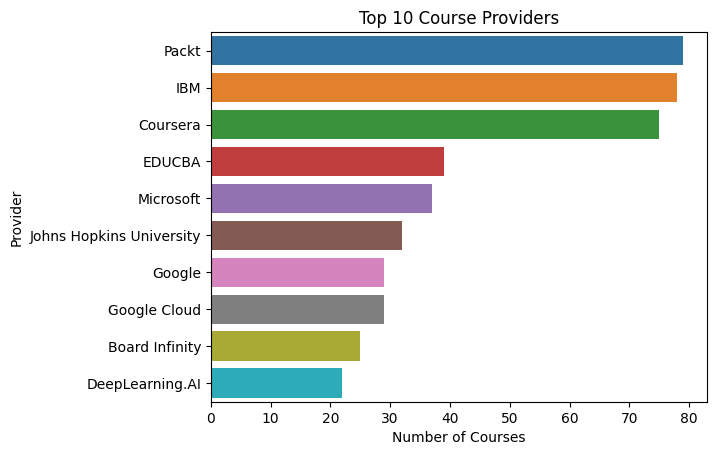

In [257]:
import seaborn as sns

top_providers = df["provider"].value_counts().head(10)

sns.barplot(
    x=top_providers.values,
    y=top_providers.index,
    palette="tab10"
)

plt.title("Top 10 Course Providers")
plt.xlabel("Number of Courses")
plt.ylabel("Provider")
plt.show()


### Course Level Distribution 

In [255]:
import seaborn as sns


C:\Users\srika\AppData\Local\Temp\ipykernel_5480\2636730363.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="level", data=df, palette="tab10")


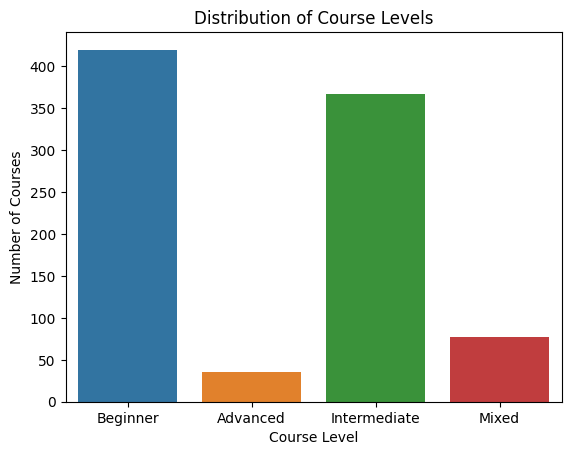

In [256]:
sns.countplot(x="level", data=df, palette="tab10")
plt.title("Distribution of Course Levels")
plt.xlabel("Course Level")
plt.ylabel("Number of Courses")
plt.show()


### Rating Distribution

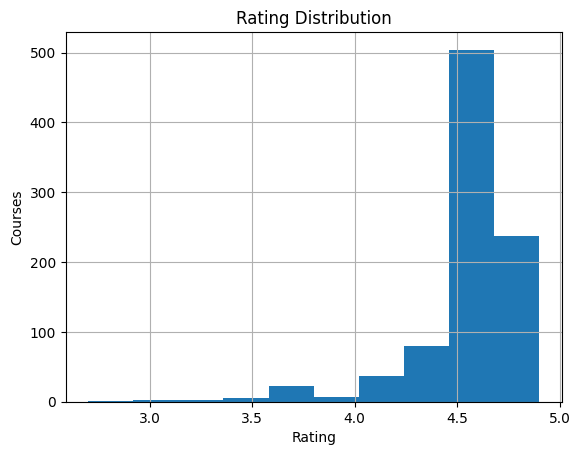

In [157]:
df["rating"].hist()
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Courses")
plt.show()


### Top 10 Highest Rated Courses

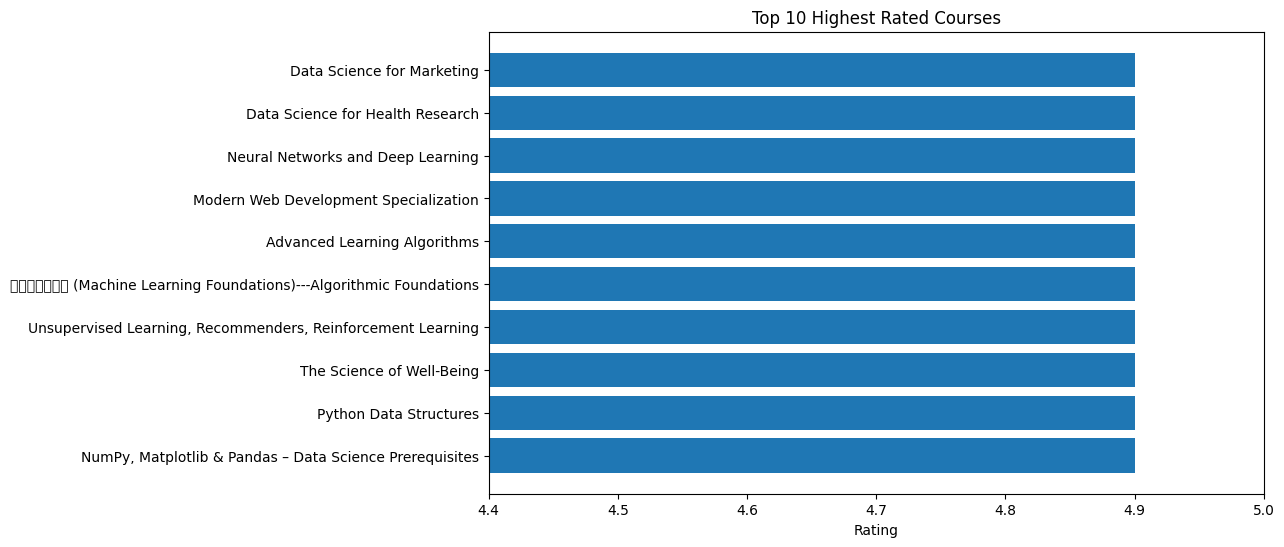

In [189]:
top_rated = df.sort_values("rating", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_rated["title"], top_rated["rating"])
plt.xlim(4.4, 5.0)
plt.xlabel("Rating")
plt.title("Top 10 Highest Rated Courses")
plt.gca().invert_yaxis()
plt.show()


### Average Rating by Provider 

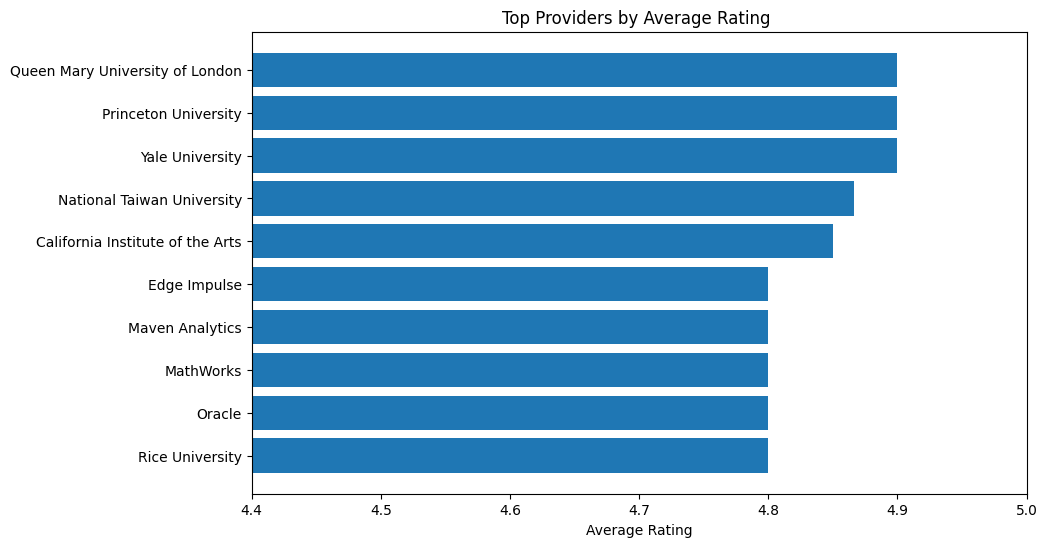

In [185]:
avg_rating = (
    df.groupby("provider")["rating"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
plt.barh(avg_rating.index, avg_rating.values)

plt.xlim(4.4, 5.0)   # zoomed scale
plt.xlabel("Average Rating")
plt.title("Top Providers by Average Rating ")
plt.gca().invert_yaxis()
plt.show()


### Course Duration Distribution 

C:\Users\srika\AppData\Local\Temp\ipykernel_5480\636291709.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


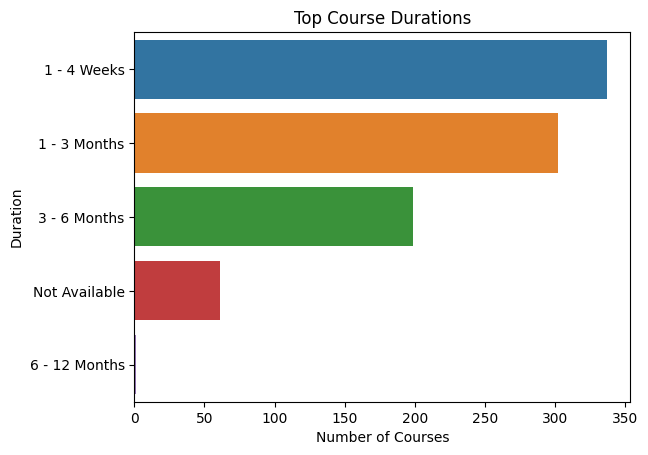

In [258]:
import seaborn as sns

top_duration = df["duration"].value_counts().head(10)

sns.barplot(
    x=top_duration.values,
    y=top_duration.index,
    palette="tab10"
)

plt.title("Top Course Durations")
plt.xlabel("Number of Courses")
plt.ylabel("Duration")
plt.show()


### Skill Count Distribution 

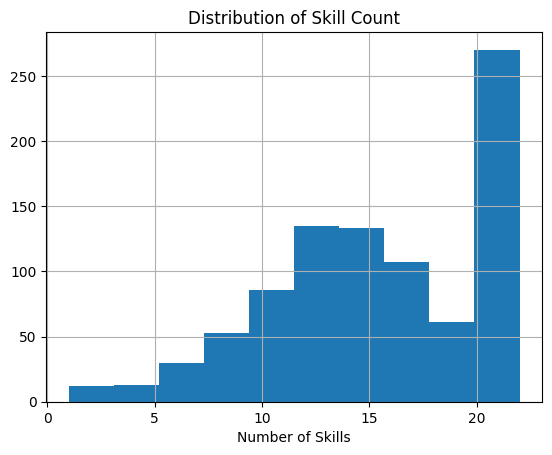

In [163]:
df["skill_count"].hist()
plt.title("Distribution of Skill Count")
plt.xlabel("Number of Skills")
plt.show()


### Top 10 Courses by Skill Count 

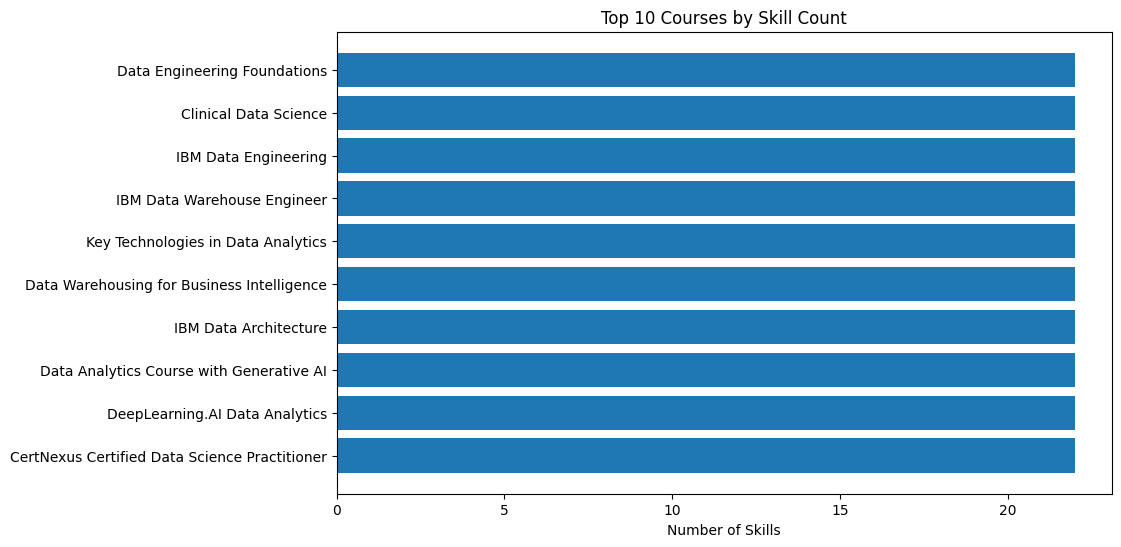

In [196]:
top_skills = df.sort_values("skill_count", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_skills["title"], top_skills["skill_count"])
plt.xlabel("Number of Skills")
plt.title("Top 10 Courses by Skill Count")
plt.gca().invert_yaxis()
plt.show()


### 

### Skill Count vs Rating 

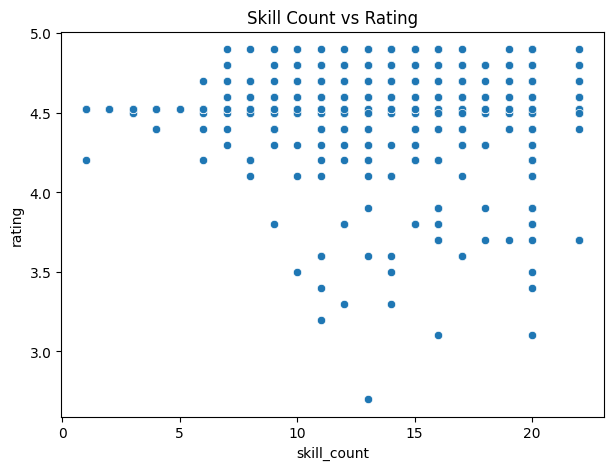

In [260]:
import seaborn as sns

plt.figure(figsize=(7,5))
sns.scatterplot(
    x="skill_count",
    y="rating",
    data=df
)

plt.title("Skill Count vs Rating")
plt.show()


### Courses per Provider 

C:\Users\srika\AppData\Local\Temp\ipykernel_5480\2616850105.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


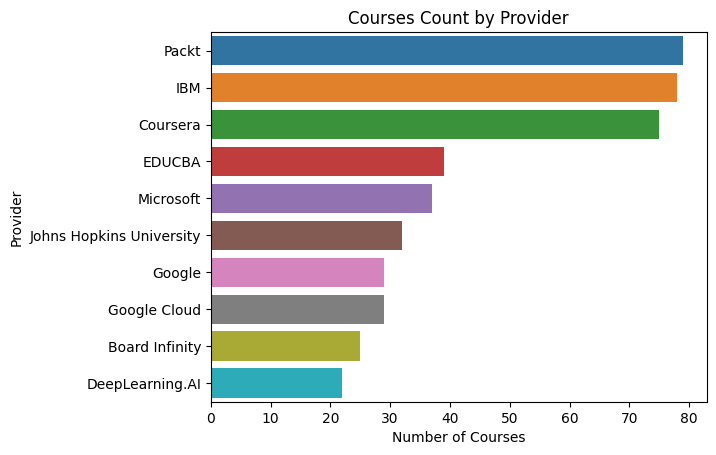

In [259]:
import seaborn as sns

top_providers = df["provider"].value_counts().head(10)

sns.barplot(
    x=top_providers.values,
    y=top_providers.index,
    palette="tab10"
)

plt.title("Courses Count by Provider")
plt.xlabel("Number of Courses")
plt.ylabel("Provider")
plt.show()


### Rating by Level (Box Plot)

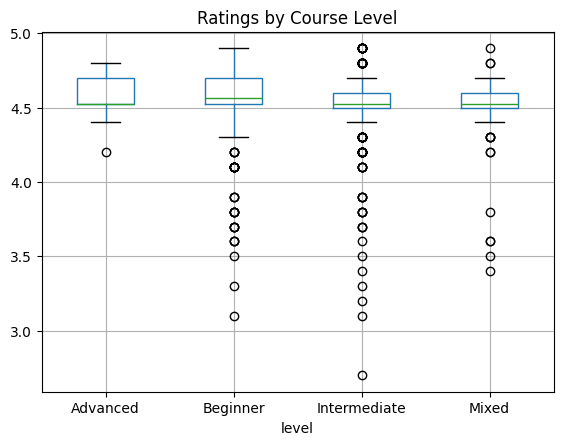

In [167]:
df.boxplot(column="rating", by="level")
plt.title("Ratings by Course Level")
plt.suptitle("")
plt.show()


### Average Skill Count by Level 

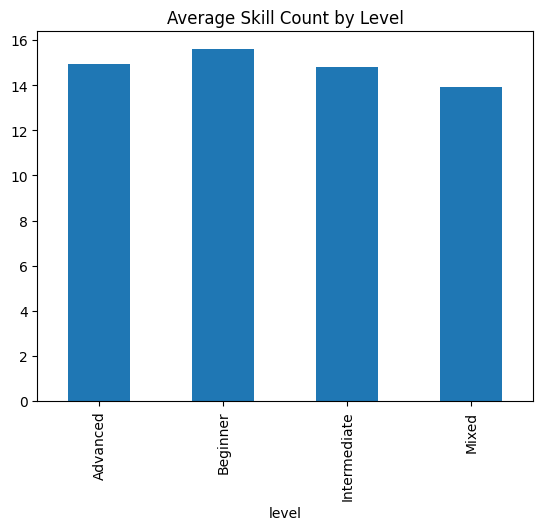

In [168]:
df.groupby("level")["skill_count"].mean().plot(kind="bar")
plt.title("Average Skill Count by Level")
plt.show()


### Provider vs Course Count

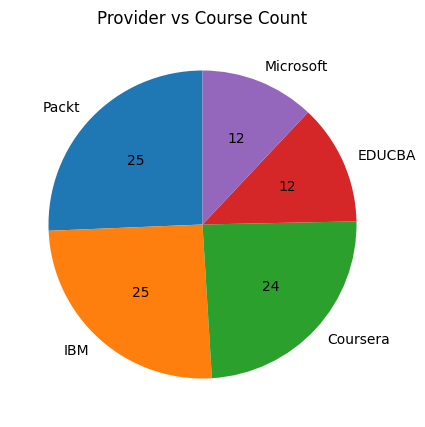

In [198]:
provider_counts = df["provider"].value_counts().head(5)

plt.figure(figsize=(5,5))

plt.pie(
    provider_counts,
    labels=provider_counts.index,
    autopct="%d",
    startangle=90
)

plt.title("Provider vs Course Count")
plt.show()


### Rating Trend 

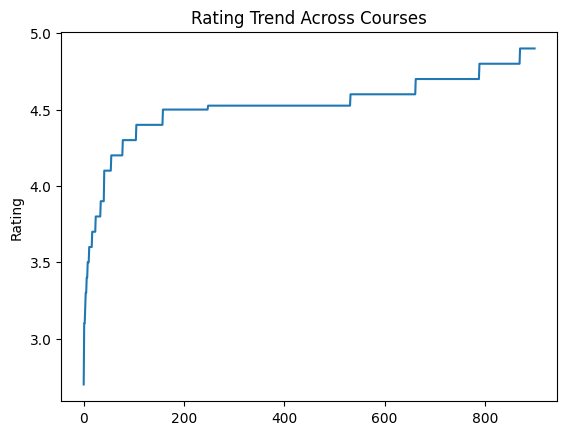

In [170]:
df.sort_values("rating")["rating"].reset_index(drop=True).plot()
plt.title("Rating Trend Across Courses")
plt.ylabel("Rating")
plt.show()


### Skills Popularity

C:\Users\srika\AppData\Local\Temp\ipykernel_5480\399276128.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


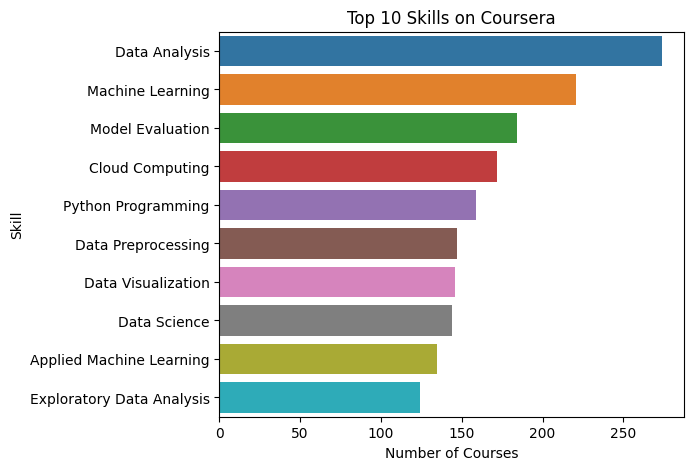

In [269]:
import seaborn as sns

plt.figure(figsize=(6,5))
sns.barplot(
    x="Count",
    y="Skill",
    data=skills_df,
    palette="tab10"
)

plt.title("Top 10 Skills on Coursera")
plt.xlabel("Number of Courses")
plt.ylabel("Skill")
plt.show()


### Average rating by provider and course level

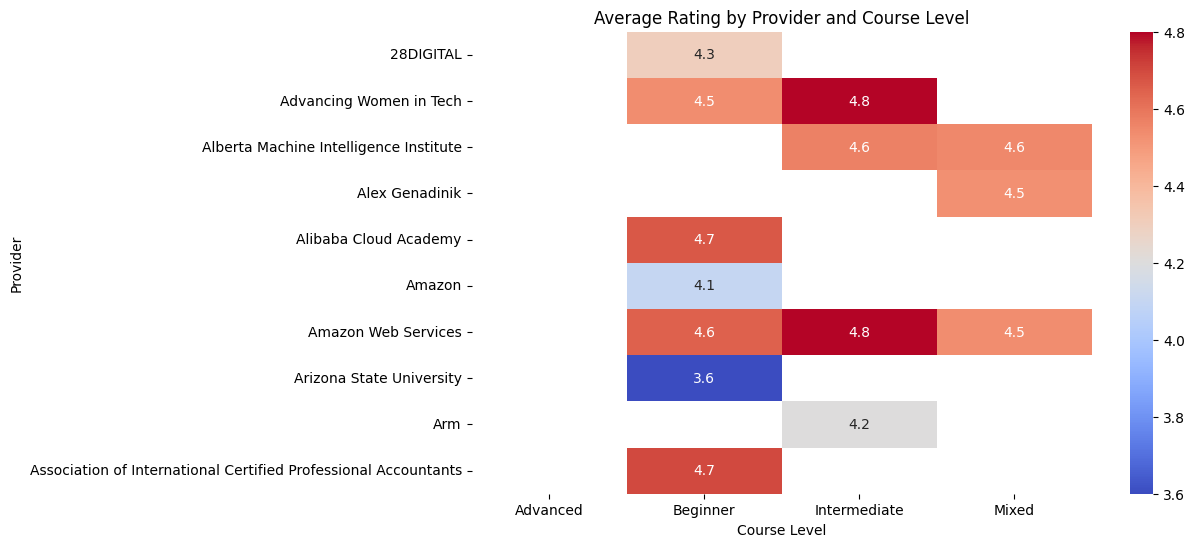

In [266]:
import seaborn as sns

pivot = df.pivot_table(
    values="rating",
    index="provider",
    columns="level",
    aggfunc="mean"
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot.head(10), annot=True, cmap="coolwarm")

plt.title("Average Rating by Provider and Course Level")
plt.xlabel("Course Level")
plt.ylabel("Provider")
plt.show()


### Level × Skill Count × Rating

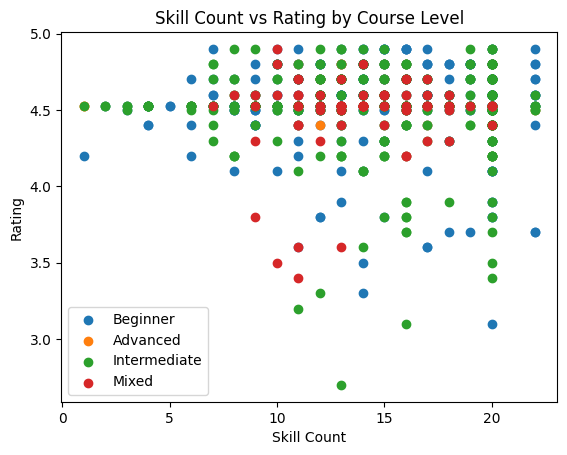

In [243]:
for level in df["level"].unique():
    subset = df[df["level"] == level]
    plt.scatter(
        subset["skill_count"],
        subset["rating"],
        label=level
    )

plt.xlabel("Skill Count")
plt.ylabel("Rating")
plt.title("Skill Count vs Rating by Course Level")
plt.legend()
plt.show()


### HYPOTHESIS TESTING

In [200]:
### Hypothesis testing is used to verify assumptions using statistical methods instead of guessing.

In [201]:
### In this project, hypothesis testing is used to analyze whether course attributes influence ratings.

#### Hypothesis Test 1

In [207]:
# Does course level affect rating?Does course level affect rating?

# Objective:
# To check whether ratings differ based on course level.

# Null Hypothesis (H₀):

# There is no significant difference in ratings among course levels.

# Alternative Hypothesis (H₁):

# There is a significant difference in ratings among course levels.



In [203]:
# Statistical Test Used (One-way ANOVA)

# (Used when comparing more than two groups)

# Why ANOVA?

# Multiple levels: Beginner, Intermediate, Advanced

# Numeric variable: rating

In [204]:
from scipy.stats import f_oneway

beginner = df[df["level"] == "Beginner"]["rating"]
intermediate = df[df["level"] == "Intermediate"]["rating"]
advanced = df[df["level"] == "Advanced"]["rating"]

f_stat, p_value = f_oneway(beginner, intermediate, advanced)

print("F-statistic:", f_stat)
print("P-value:", p_value)


F-statistic: 5.758584811887447
P-value: 0.0032845719942168317


In [206]:
# Decision Rule

# If p < 0.05 → reject H₀

# If p ≥ 0.05 → fail to reject H₀


# Interpretation

# p < 0.05 → ratings vary by level

# p ≥ 0.05 → ratings are similar across levels

#### Hypothesis Test 2

In [208]:
# Are Coursera courses highly rated (rating > 4.5)?


# Null Hypothesis (H₀):

# Average rating ≤ 4.5

# Alternative Hypothesis (H₁):

# Average rating > 4.5



In [211]:
# Statistical Test(One-sample t-test)


from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(df["rating"], 4.5)

print("T-statistic:", t_stat)
print("P-value:", p_value)



T-statistic: 3.032200537930778
P-value: 0.0024974499430331586


In [212]:
# Interpretation

# p < 0.05 → courses are significantly well rated
# p ≥ 0.05 → not significantly higher

#### Hypothesis Test 3

In [213]:
# Does number of skills affect rating?

# Null Hypothesis (H₀):

# There is no relationship between skill count and rating.

# Alternative Hypothesis (H₁):

# There is a relationship between skill count and rating.

In [214]:
# Statistical Test(Pearson Correlation Test)


from scipy.stats import pearsonr

corr, p_value = pearsonr(df["skill_count"], df["rating"])

print("Correlation:", corr)
print("P-value:", p_value)


Correlation: 0.008730156922092256
P-value: 0.7936717101267871


In [215]:
# Interpretation

# p < 0.05 → significant correlation exists

# p ≥ 0.05 → no significant relationship

####  Hypothesis Test 4

In [216]:
# Does course duration influence rating?

# Null Hypothesis (H₀):

# Course duration has no impact on rating.

# Alternative Hypothesis (H₁):

#Course duration affects rating.

In [228]:
# convert duration to numeric
df["duration_num"] = df["duration"].str.extract(r"(\d+)").astype(float)


In [229]:
# Statistical Test(Correlation test)


from scipy.stats import pearsonr

corr, p_value = pearsonr(
    duration_df["duration_num"],
    duration_df["rating"]
)

print("Correlation:", corr)
print("P-value:", p_value)


Correlation: -0.013493195998007053
P-value: 0.6963352813359471


In [230]:
# Interpretation

# Weak or near-zero correlation → duration does not strongly affect rating

In [272]:
df

,title,provider,skills_gained,rating,level,duration,skill_count,duration_num
0,"Python for Data Science, AI & Development",IBM,"Data Import/Export, Programming Principles, We...",4.600000,Beginner,1 - 3 Months,17,1.0
1,What is Data Science?,IBM,"Data Literacy, Data Mining, Big Data, Cloud Co...",4.700000,Beginner,1 - 4 Weeks,11,1.0
2,IBM Data Science,IBM,"Exploratory Data Analysis, Dashboard, Data Vis...",4.600000,Beginner,3 - 6 Months,20,3.0
3,Foundations of Data Science,Google,"Data Storytelling, Data Ethics, Data-Driven De...",4.700000,Advanced,1 - 3 Months,12,1.0
4,Databases and SQL for Data Science with Python,IBM,"SQL, Relational Databases, Stored Procedure, D...",4.700000,Beginner,1 - 3 Months,11,1.0
...,...,...,...,...,...,...,...,...
895,"AI Workflow: Machine Learning, Visual Recognit...",IBM,"Model Evaluation, Tensorflow, Supervised Learn...",4.400000,Advanced,1 - 4 Weeks,20,1.0
896,Machine Learning with ChatGPT: Image Classific...,Coursera,"Model Evaluation, ChatGPT, Keras (Neural Netwo...",4.400000,Intermediate,Not Available,13,NaN
897,Machine Learning for Marketing,O.P. Jindal Global University,"Marketing Analytics, Anomaly Detection, Digita...",3.800000,Beginner,3 - 6 Months,20,3.0
898,Advanced Machine Learning Techniques,Coursera,"Transfer Learning, Data Preprocessing, Hugging...",4.525649,Intermediate,1 - 3 Months,4,1.0
